# Тестовое задание на позицию Junior Analyst
## Анализ данных по рекламным кампаниям

В файле *test_data.csv* представлены данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в приложение. Необходимо исследовать данные и получить из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров. 

### Описание данных:
- `Campaign_id` - ID кампании;
- `Geo` - геопозиция, на которую настроена рекламная кампания;
- `Buyer` - байер, выполнивший запуск;
- `Impressions` - количество показов рекламных объявлений;
- `Clicks` - количество кликов; 
- `Installs` - количество установок;
- `Registrations` - количество регистраций;
- `Spend` - Затраченная сумма;
- `Revenue_ad` (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
- `Revenue_in_app` (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
- `Payers` (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

In [1]:
# необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbconvert

In [2]:
# данные
data = pd.read_csv("E:\\Документы\\Data science\\Тестовые задания\\Topface_test\\test_data.csv", decimal=",")
data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

In [4]:
data.isnull().sum()

Campaign_id          0
Geo                  0
Buyer                0
Impressions          0
Clicks               0
Installs             0
Registrations        0
Spend                0
Revenue_ad1d         0
Revenue_in_app1d     0
Payers1d             0
Revenue_ad7d         0
Revenue_in_app7d     0
Payers7d             0
Revenue_ad30d        0
Revenue_in_app30d    0
Payers30d            0
dtype: int64

Известно, что данные чистые, не содержат пропущенных значений. Можно приступать к анализу. 

### Добавление столбцов с метриками

Для начала добавим в таблицу новые столбцы, которые будут отражать основные маркетинговые метрики, а именно:

- `CTR` - показатель кликабельности (кол-во кликов / кол-во показов)
- `CTI` - количество установок за клик (кол-во установок / кол-во кликов)
- `CPC` - стоимость клика (расходы / кол-во кликов)
- `RPC` - доход с каждого клика по рекламе (доходы / кол-во кликов)
- `ROAS` - рентабельность рекламных расходов (доходы / расходы)
- `CPI` - цена одной установки (расходы / кол-во установок)
- `CPM` - стоимость 1000 показов (расходы / кол-во показов*1000)
- `CPA` - цена одной регистрации (расходы / кол-во регистраций)
- `AR` - процент "активации" (кол-во регистраций / кол-во установок)
- `CR` - конверсия покупателей (кол-во покупателей / кол-во регистраций)

In [5]:
data['CTR'] = data['Clicks'] / data['Impressions']

In [6]:
data['CTI'] = data['Installs'] / data['Clicks']

In [7]:
data['CPC'] = data['Spend'] / data['Clicks']

In [8]:
data['RPC_30d'] = (data['Revenue_ad30d'] +  data['Revenue_in_app30d']) / data['Clicks']

In [9]:
data['ROAS_1d'] = (data['Revenue_ad1d'] +  data['Revenue_in_app1d']) / data['Spend']
data['ROAS_7d'] = (data['Revenue_ad7d'] +  data['Revenue_in_app7d']) / data['Spend']
data['ROAS_30d'] = (data['Revenue_ad30d'] +  data['Revenue_in_app30d']) / data['Spend']

In [10]:
data['CPI'] = data['Spend'] / data['Installs']

In [11]:
data['CPM'] = data['Spend'] / data['Impressions'] * 1000

In [12]:
data['CPA'] = data['Spend'] / data['Registrations']

In [13]:
data['AR'] = data['Registrations'] / data['Installs']

In [14]:
data['CR_30d'] = data['Payers30d'] / data['Registrations']

### Анализ данных

#### 1. Кампании в каких геолокациях показали себя хуже всего?

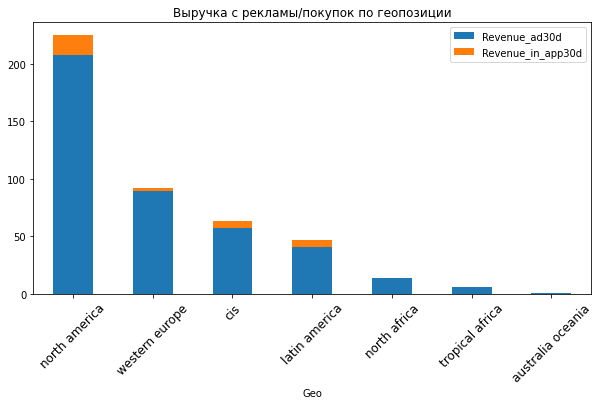

In [15]:
geo_table = data.pivot_table(index='Geo', values=['Revenue_ad30d', 'Revenue_in_app30d'])

plt.rcParams["figure.figsize"] = (10,5)
geo_table.sort_values(by='Revenue_ad30d', ascending=False).plot(kind='bar', stacked=True, title='Выручка с рекламы/покупок по геопозиции')
plt.xticks(rotation = 45, fontsize=12)

plt.show()

Как видно по графику средней выручки за месяц, лучше всех себя показали Северная Америка и Западная Европа. При этом, Северная Америка лидирует и по выручке с рекламы, и по выручке с покупок пользователей. В конце списка же находятся Австралия-Океания, а также Северная и Тропическая Африка. В данных районах рекламные компании оказались малоэффективны: они характеризуются самыми маленькими значениями средней выручки с рекламы и полным отсутствием выручки с покупок зарегистрированных пользователей.

#### 2. Кто из медиабайеров лучше всего окупается?

Окупаемость медиабайеров лучше всего будет смотреть по метрике *ROAS*.

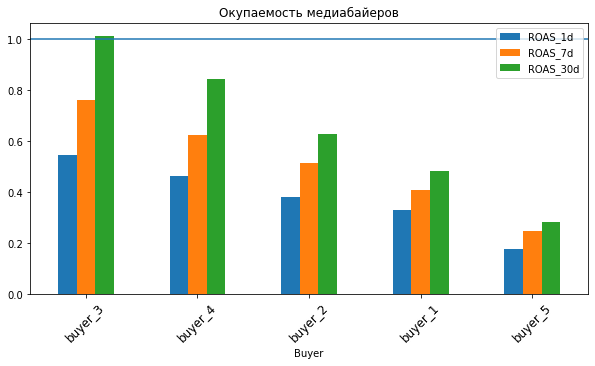

In [16]:
buyer_table = data.pivot_table(index='Buyer', values=['ROAS_1d', 'ROAS_7d', 'ROAS_30d'])
buyer_table = buyer_table.reindex(columns=['ROAS_1d', 'ROAS_7d', 'ROAS_30d'])

fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,5)
buyer_table.sort_values(by='ROAS_30d', ascending=False).plot(kind='bar', ax=ax, title='Окупаемость медиабайеров')
plt.xticks(rotation = 45, fontsize=12)

ax.hlines(1, -10, 10)

plt.show()

Лучше всего из медиабайеров окупается медиабайер №3. При этом, только через месяц доходы по его рекламным кампаниям начинают превосходить расходы. У остальных же медиабайеров затраты на рекламу не окупаются в принципе. Хуже всего справляется медиабайер №5: окупаемость его рекламных кампаний не достигает даже 40%.

#### 3. Стоимость одной установки
ТОП-5 рекламных кампаний по самым дешевым установкам:

In [17]:
data[['Campaign_id', 'CPI']].sort_values(by='CPI').head()

,Campaign_id,CPI
20,21,0.025330
55,56,0.027341
44,45,0.035084
26,27,0.045905
40,41,0.051174


ТОП-5 рекламных кампаний по самым дорогим установкам:

In [18]:
data[['Campaign_id', 'CPI']].sort_values(by='CPI', ascending=False).head()

,Campaign_id,CPI
80,81,2.155000
19,20,0.802027
36,37,0.755781
65,66,0.742162
53,54,0.703281


Общее распределение CPI по кампаниям:

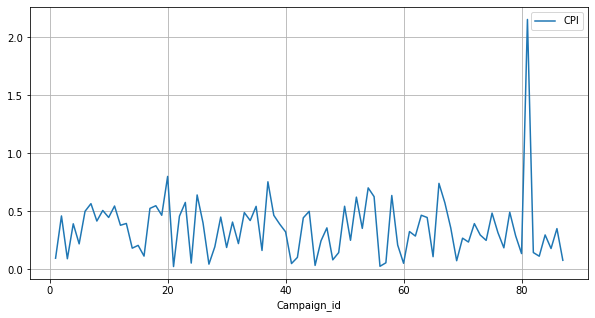

In [19]:
data.plot(x='Campaign_id', y='CPI', grid=True)
plt.show()

In [20]:
data.loc[[20, 55, 80], ['Campaign_id', 'Geo', 'Buyer']]

,Campaign_id,Geo,Buyer
20,21,north africa,buyer_5
55,56,north africa,buyer_5
80,81,australia oceania,buyer_5


Минимальная цена установки зафиксирована для рекламных кампаний 21 и 56 (2.5 копейки и 2.7 копейки соответственно). Максимальная же характерна для 81-й кампании (почти 2 рубля за одну установку). Что интересно, и кампании с самым низким CPI, и кампани с самым высоким CPI принадлежат медиабайеру №5. Однако различается геопозиция - самые дешевые характерны для Северной Америки, самая дорогая для Австралии-Океании. Что согласуется с данными по геопозициям, представлеными выше.

#### 4. Цена одной регистрации и стоимость 1000 показов 

Распределение метрики, отражающей цену одной регистрации, по кампаниям:

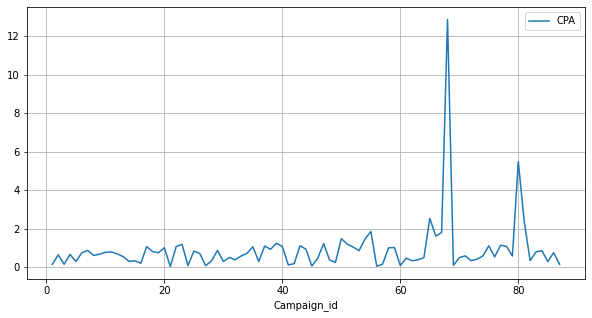

In [21]:
data.plot(x='Campaign_id', y='CPA', grid=True)
plt.show()

По графику можно наблюдать несколько аномально высоких пиков. ТОП-3 кампании с самой высокой стоимостью одной регистрации:

In [22]:
data[['Campaign_id', 'CPA']].sort_values(by='CPA', ascending=False).head(3)

,Campaign_id,CPA
67,68,12.880000
79,80,5.487500
64,65,2.536364


ТОП-5 кампаний с самой низкой стоимостью одной регистрации:

In [23]:
data[['Campaign_id', 'CPA']].sort_values(by='CPA').head()

,Campaign_id,CPA
20,21,0.032871
55,56,0.051116
44,45,0.057808
26,27,0.076500
23,24,0.080468


Составленный ТОП-5 практически полностью совпадает с ТОП-5 рекламных кампаний с самой маленькой ценой установки. 

Теперь посмотрим на распределение параметра стоимости за 1000 показов:

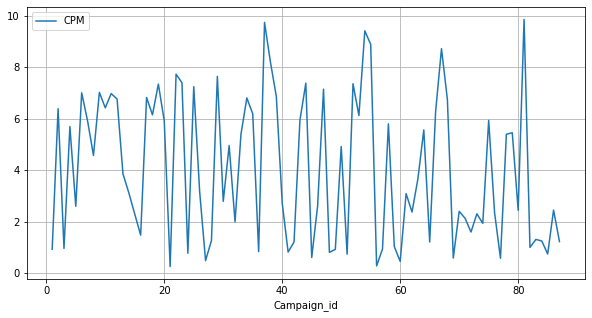

In [24]:
data.plot(x='Campaign_id', y='CPM', grid=True)
plt.show()

Стоимость 1000 показов достаточно равномерно колебается относительно среднего значения, каких-то особо выделяющихся пиков не наблюдается.

**ТОП-5 кампаний с самой низкой стоимостью 1000 показов:**

In [25]:
data[['Campaign_id', 'CPM']].sort_values(by='CPM').head()

,Campaign_id,CPM
20,21,0.257255
55,56,0.282195
59,60,0.456686
26,27,0.486938
76,77,0.579909


Первая, вторая и четвертая позиции в топе снова совпадают.

**ТОП-5 кампаний с самой высокой стоимостью 1000 показов:**

In [26]:
data[['Campaign_id', 'CPM']].sort_values(by='CPM', ascending=False).head()

,Campaign_id,CPM
80,81,9.862700
36,37,9.749068
53,54,9.420260
54,55,8.892879
66,67,8.726979


Из предыдущего раздела известно, что кампания №81 также характеризуется и самой высокой стоимостью установки.

#### 5. Кликабельность и то, что с ней связано

С кликабельностью связано 4 основных метрики: **CTR** (показатель кликабельности), **CTI** (количество установок за клик), **CPC** (стоимость клика) и **RPC** (доход с каждого клика по рекламе).

**ТОП-5 кампаний с высоким показателем кликабельности:**

In [27]:
data.sort_values(by='CTR', ascending=False).head()[['Campaign_id', 'CTR', 'CTI', 'Geo', 'Buyer']] 

,Campaign_id,CTR,CTI,Geo,Buyer
23,24,0.079362,0.176973,north america,buyer_1
52,53,0.064620,0.267635,north america,buyer_2
46,47,0.056383,0.353659,north america,buyer_4
44,45,0.054305,0.319591,latin america,buyer_1
78,79,0.051225,0.367150,north america,buyer_2


4 из 5 кампаний, попавших в топ, были настроены на Северную Америку. При этом, в данной метрике неплохо себя показали медиабайеры 1 и 2. Рекламная кампания медиабайера №4 также попала в топ.

**ТОП-5 кампаний с высоким показателем количества установок за клик:**

In [28]:
data.sort_values(by='CTI', ascending=False).head()[['Campaign_id', 'CTR', 'CTI', 'Geo', 'Buyer']] 

,Campaign_id,CTR,CTI,Geo,Buyer
67,68,0.030668,0.615385,north america,buyer_2
12,13,0.015985,0.608532,western europe,buyer_2
13,14,0.028109,0.603594,cis,buyer_2
61,62,0.013796,0.597938,western europe,buyer_2
62,63,0.014454,0.542373,north america,buyer_4


По настраиваемой геолокации лидируют по количеству установок за клик Северная Америка и Западная Европа. А вот среди медиабайеров в данном случае хорошо отличился №2. Его рекламные кампании принесли большее число установок за 1 клик.

**ТОП-5 кампаний с самой маленькой стоимостью клика:**

In [29]:
data.sort_values(by='CPC').head()[['Campaign_id', 'CPC', 'RPC_30d', 'Geo', 'Buyer']] 

,Campaign_id,CPC,RPC_30d,Geo,Buyer
20,21,0.007147,0.000755,north africa,buyer_5
23,24,0.009762,0.009316,north america,buyer_1
44,45,0.011212,0.005946,latin america,buyer_1
55,56,0.012337,0.001557,north africa,buyer_5
59,60,0.015177,0.002359,tropical africa,buyer_1


2 из 5 рекламных кампаний из данного топа были размещены медиабайером №5, остальные - медиабайером №1.

**ТОП-5 кампаний с самым высоким общим доходом за клик:**

In [30]:
data.sort_values(by='RPC_30d', ascending=False).head()[['Campaign_id', 'CPC', 'RPC_30d', 'Geo', 'Buyer']] 

,Campaign_id,CPC,RPC_30d,Geo,Buyer
62,63,0.253559,0.568236,north america,buyer_4
32,33,0.245789,0.340076,north america,buyer_4
24,25,0.241368,0.324010,north america,buyer_3
12,13,0.241368,0.294385,western europe,buyer_2
19,20,0.319712,0.263175,north america,buyer_4


Рекламные кампании медиабайера №4 заняли 3 из 5 мест в топе. 4 из 5 топ-кампаний, при этом, орентированы на Северную Америку.

**Средние значения по медиабайерам**:

Зелеными выделены наилучшие показатели, красными - худшие.

In [31]:
subset = ['CTR', 'CTI', 'RPC_30d']

(
    data.pivot_table(index='Buyer', values=['CTR', 'CTI', 'CPC', 'RPC_30d'])
    .style
    .highlight_null(null_color='lightgrey')
    .highlight_max(color='yellowgreen', subset=subset)
    .highlight_max(color='coral', subset='CPC')
    .highlight_min(color='coral', subset=subset)
    .highlight_min(color='yellowgreen', subset='CPC')
)

,CPC,CTI,CTR,RPC_30d
Buyer,,,,
buyer_1,0.070754,0.317572,0.036250,0.038990
buyer_2,0.146038,0.445899,0.029513,0.095710
buyer_3,0.191534,0.353711,0.034501,0.194024
buyer_4,0.169162,0.387779,0.025686,0.143703
buyer_5,0.179533,0.384015,0.024314,0.055055


Если рассматривать в среднем, то на данных метриках хорошо показал себя медиабайер №1 по самой меньшей стоимости за клик и высокому показателю кликабельности, медиабайер №2 по количеству установок за клик и медиабайер №3 по доходу с каждого клика. Однако у №1 наименьший процент установок от числа кликов и, следовательно, меньший доход с одного клика, у а №3 - самая высокая стоимость клика. 

#### 6. Процент "активации" и конверсия покупателей

**Средние значения метрик по медиабайерам:**

In [32]:
(
    data.pivot_table(index='Buyer', values=['AR', 'CR_30d'])
    .style
    .highlight_null(null_color='lightgrey')
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

,AR,CR_30d
Buyer,,
buyer_1,0.537973,0.002826
buyer_2,0.500476,0.006497
buyer_3,0.667215,0.012609
buyer_4,0.646803,0.007509
buyer_5,0.545743,0.005961


По средним значениям данных метрик определенно выигрывает медиабайер №3. Его рекламные кампании характеризуются самыми высокими значениями количества регистраций на количество установок, а также конверсией зарегистрировавшихся пользователей в покупателей в течение месяца. Рекламные кампании медиабайера №1 показывают самый низкий процент конверсии пользователей, а медиабайера №2 - самый низкий процент активации (примерно 50% пользователей регистрируются в приложении после его установки) 

### Общий вывод

В рамках данного исследования с помощью основных маркетинговых метрик были изучены данные по 87 рекламным кампаниям, ориентированных на разные регионы и запущенных 5 различными медиабайерами.

**Основные выводы:**
- Прибыльнее всего оказались кампании, ориентированные на Северную Америку и Западную Европу
- Кампании, настроенные на Австралию-Океанию или Африку, не только характеризовались малой выручкой, но и полным отсутствием прибыли с покупок пользователей
- Лучше всех из медиабайеров по окупаемости, а также показателям конверсии пользователей в покупатели и проценту "активации" приложения, показал себя медиабайер №3. Клики по его рекламным кампаниям характеризуются самой высокой стоимостью, но и самой большой доходностью.
- Затраты на рекламу у остальных медиабайеров, в среднем, не окупаются даже за месяц действия.
- Одними из самых "дешевых" кампаний оказались №21, 24, 45, 56. Они характеризуются самой маленькой стоимостью установки приложения, самой маленькой стоимостью регистрации, самой маленькой стоимостью 1000 показов, самой маленькой стоимостью клика и, к тому же, имеют достаточно высокий показатель кликабельности.
- Кампания №81 оказалась самой дорогой по стоимости установки и стоимости регистрации